In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yaml
import seaborn as sns
import ipywidgets as widgets

def get_config():
    with open("config.yml", "r") as my_config:
        config = yaml.safe_load(my_config)
    return config
config = get_config()
        
df_before_ph = pd.read_csv(config['ph'])
df_before_plaque = pd.read_csv(config['plaque'])
df_before_gum_bleeding = pd.read_csv(config['gum_bleeding'])
df_lifesum = pd.read_csv(config['lifesum'])

df_after_ph = pd.read_csv(config['ph'])
df_after_plaque = pd.read_csv(config['plaque'])
df_after_gum_bleeding = pd.read_csv(config['gum_bleeding'])

# Specified colors (corrected hex codes)
colors = ['#FE7F2D', '#619B8A', '#FCCA46', '#A1C181', '#233D4D']

In [2]:

# Cleanup and preparation
df_before_ph_cleaned = df_before_ph.dropna()
df_after_ph_cleaned = df_after_ph.dropna()

df_before_ph_sorted = df_before_ph_cleaned.sort_values(by='Weeks')
df_after_ph_sorted = df_after_ph_cleaned.sort_values(by='Weeks')

weeks_before = df_before_ph_sorted['Weeks']
weeks_after = df_after_ph_sorted['Weeks']

participants = df_before_ph_sorted.columns[1:].tolist()

# Function to plot data for selected participant
def plot_data(participant):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    
    if participant in df_before_ph_sorted.columns:
        axes[0].plot(weeks_before, df_before_ph_sorted[participant], marker='o', label='Before', color='blue')
        axes[0].set_title(f'{participant} - Before')
        axes[0].set_xlabel('Weeks')
        axes[0].set_ylabel('pH Values')
        axes[0].legend()
        
    if participant in df_after_ph_sorted.columns:
        axes[1].plot(weeks_after, df_after_ph_sorted[participant], marker='o', label='After', color='green')
        axes[1].set_title(f'{participant} - After')
        axes[1].set_xlabel('Weeks')
        axes[1].legend()
    
    plt.tight_layout()
    plt.show()

# Create a Dropdown widget for participants
participant_selector = widgets.Dropdown(
    options=participants,
    value=participants[0],
    description='Participant:',
)

# Widget interaction
widgets.interactive(plot_data, participant=participant_selector)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


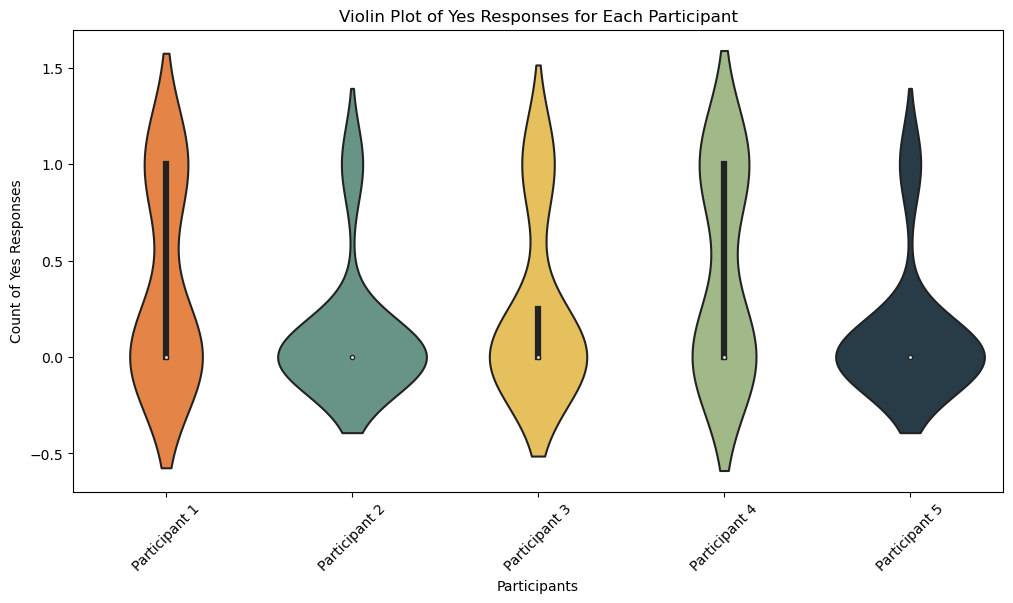

In [5]:
# Convert 'Yes'/'No' to 1/0
df_gum_bleeding.replace({'Yes': 1, 'yes': 1, 'No': 0, 'NO': 0, 'no': 0}, inplace=True)

# Create violin plot for each participant with specified colors
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_gum_bleeding, palette=colors)
plt.xlabel('Participants')
plt.ylabel('Count of Yes Responses')
plt.title('Violin Plot of Yes Responses for Each Participant')
plt.xticks(rotation=45)
plt.show()

# Make a scatter plot for each participant. On the x-as the date and on the y-as the yes/no value. Maybe for each participant a differnt colour, show maybe show them toghter. 

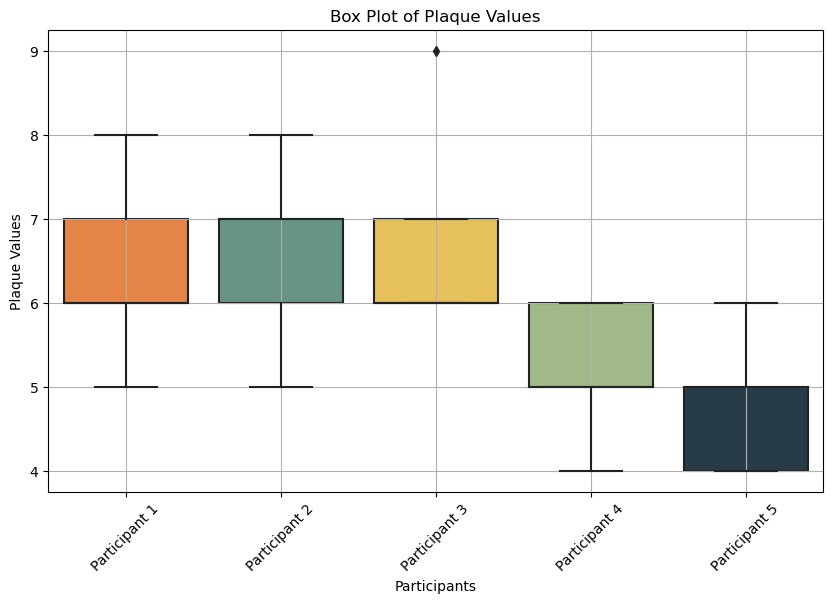

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_plaque, palette=colors)
plt.title('Box Plot of Plaque Values')
plt.xlabel('Participants')
plt.ylabel('Plaque Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

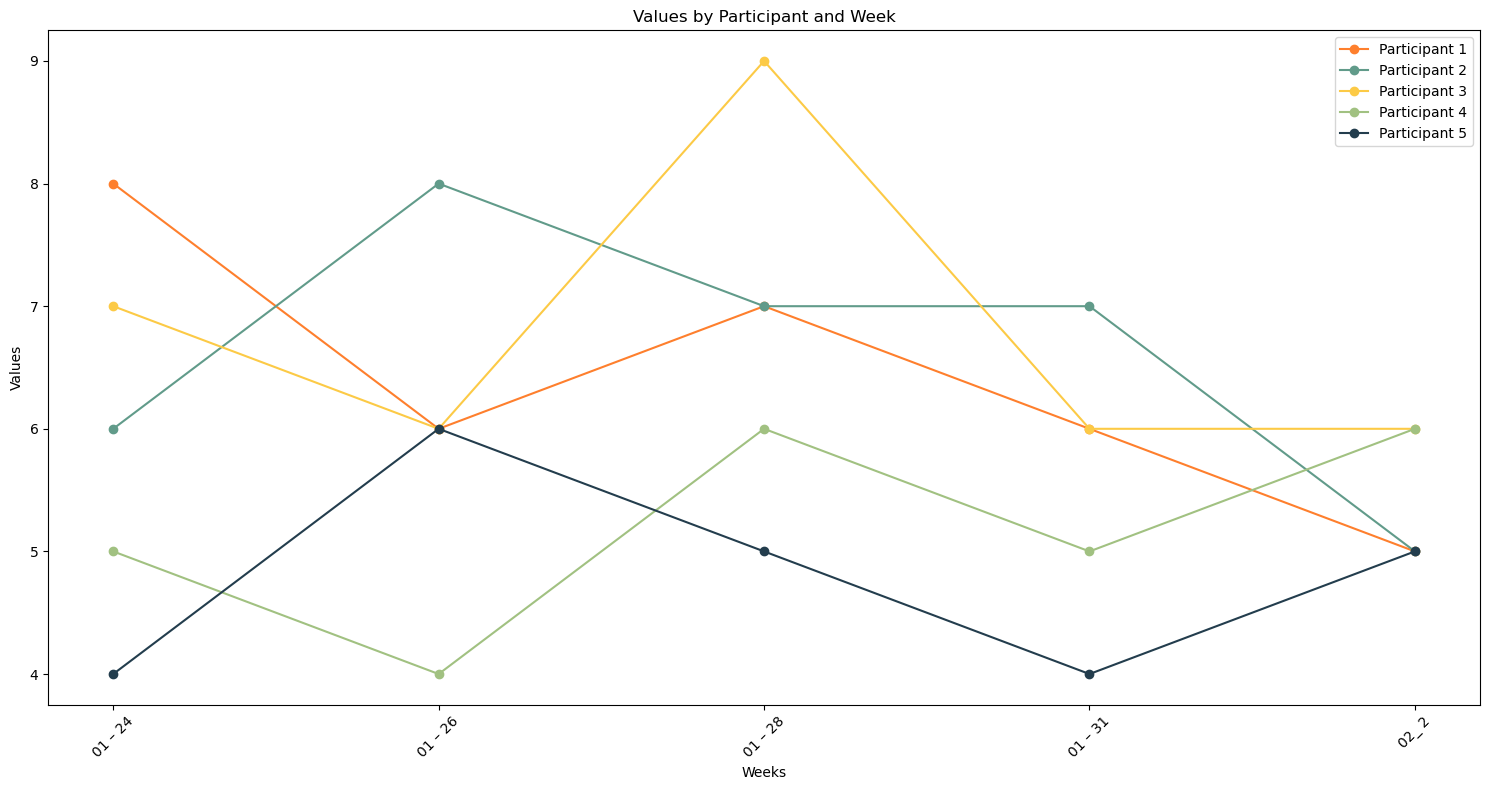

In [10]:
# Specified colors (corrected hex codes)
colors = ['#FE7F2D', '#619B8A', '#FCCA46', '#A1C181', '#233D4D']
df_plaque_cleaned = df_plaque.dropna()

# Sort the DataFrame by the 'Weeks' column
df_plaque_sorted = df_plaque_cleaned.sort_values(by='Weeks')

# Assuming df_ph_sorted is the correct DataFrame
weeks = df_plaque_sorted['Weeks']
participants = df_plaque_sorted.columns[1:]

fig, ax = plt.subplots(figsize=(15, 8))

# Plotting lines for each participant with specified colors
for i, participant in enumerate(participants):
    ax.plot(weeks, df_plaque_sorted[participant], marker='o', label=participant, color=colors[i])

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Date')
ax.set_ylabel('Amount of teeth with plaque')
ax.set_title('')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



/tmp/ipykernel_352487/3454416594.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_consumption = df_lifesum.mean()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (4,).

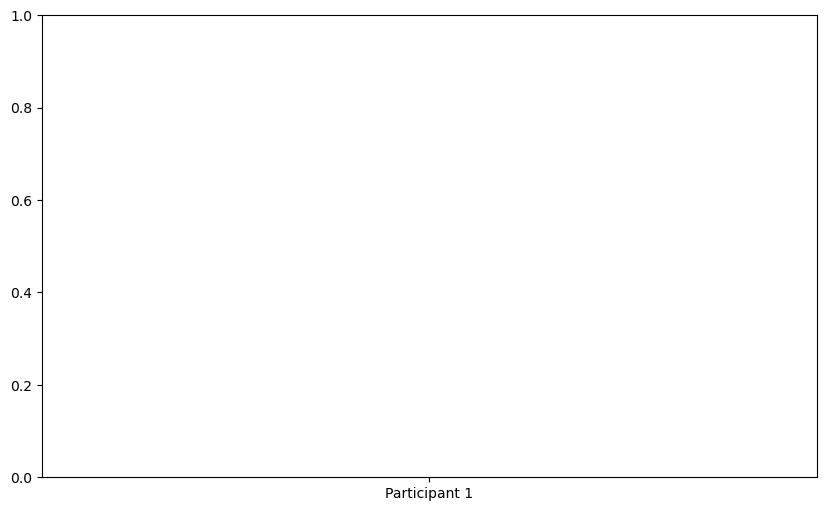

In [5]:
def plot_lactobacillus_consumption_avg(df_lifesum):
    participants = df_lifesum.columns[1:]

    # Replace null values with 0
    df_lifesum.fillna(0, inplace=True)

    # Compute average consumption for each person
    avg_consumption = df_lifesum.mean()

    plt.figure(figsize=(10, 6))
    plt.bar(participants, avg_consumption[1:], color='skyblue')  # Plotting bar chart, excluding the first value
    plt.title('Average Consumption of Lactobacillus for Each Person')
    plt.xlabel('Participants')
    plt.ylabel('Average Consumption')
    plt.xticks(rotation=45)
    plt.grid(axis='y')  # Add gridlines along y-axis
    plt.show()

# Plot average consumption of lactobacillus for each person
plot_lactobacillus_consumption_avg(df_lifesum)